***

**<center><font size = "5">Synthetic Data Notebook<center>**
***
<center><font size = "2">Prepared by: Kurt Klingensmith<center>

***

# Notebook Setup

## Libraries:

In [52]:
# Data Handling
import pandas as pd
import numpy as np

# Data visualization
import plotly.express as px

%config InlineBackend.figure_format='retina'

In [53]:
# Anonymizer:
from faker import Faker
faker = Faker()

# Create a list of Students:
fake_names = [faker.name() for x in range (100)]
df = pd.DataFrame(fake_names, columns = ['Student'])

# Add age:
df['Age'] = np.random.randint(20, 25, df.shape[0])

df.head()

,Student,Age
0,Daisy Payne,23
1,Emily Lopez,24
2,Brittany Shaw,23
3,Benjamin Bell,21
4,Blake Browning,23


In [54]:
# Define Class Session:
testTime = ['Morning', 'Afternoon', 'Evening']
df['ClassSession'] = np.random.choice(testTime, size=len(df))

df.head()

,Student,Age,ClassSession
0,Daisy Payne,23,Evening
1,Emily Lopez,24,Morning
2,Brittany Shaw,23,Evening
3,Benjamin Bell,21,Evening
4,Blake Browning,23,Evening


In [55]:
# Morning Score Test 1:

low = 0
high = 100

mean = 85
scale = 8
size = len(df[df['ClassSession'] == 'Morning'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Morning', 'Test1'] = np.clip(values, low, high).astype(int)

# Morning Score Test 2:

mean = 74
scale = 7
size = len(df[df['ClassSession'] == 'Morning'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Morning', 'Test2'] = np.clip(values, low, high).astype(int)

# Morning Score Test 3:

mean = 89
scale = 5
size = len(df[df['ClassSession'] == 'Morning'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Morning', 'Test3'] = np.clip(values, low, high).astype(int)

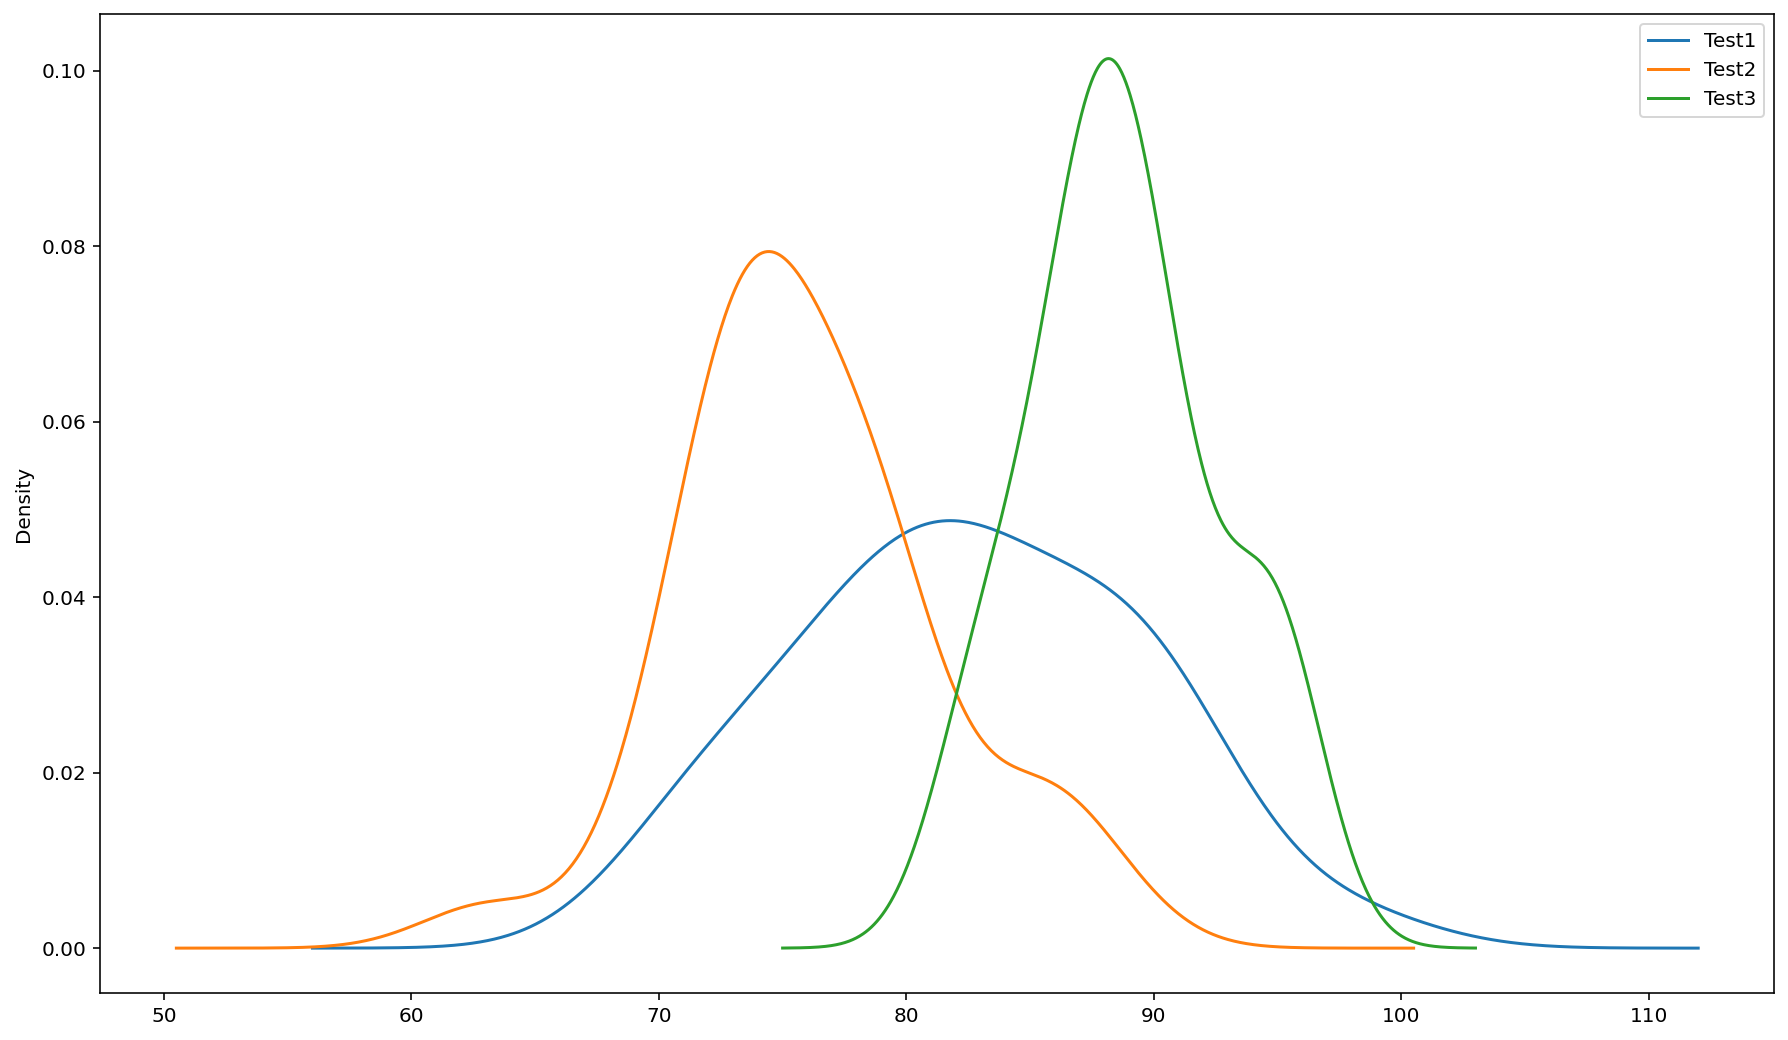

In [56]:
# Show example of Morning Session test score distribution: 
morningScores = df[df['ClassSession'] == 'Morning'][['Test1', 'Test2', 'Test3']]

morningScores.plot.kde(figsize=(15,9));

In [57]:
# Show example of Morning Session test score distribution (Plotly): 

plot = px.histogram(morningScores, 
             x=['Test1', 'Test2', 'Test3'], 
             nbins=len(morningScores))
plot.update_layout(
    title={'text': "Distribution of Test Scores for Morning Session",
           'xanchor': 'center',
           'yanchor': 'top',
           'x': 0.5},
    xaxis_title='Test Score',
    yaxis_title='Count')
plot.show()

In [58]:
# Afternoon Score Test 1:

low = 0
high = 100

mean = 78
scale = 5
size = len(df[df['ClassSession'] == 'Afternoon'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Afternoon', 'Test1'] = np.clip(values, low, high).astype(int)

# Afternoon Score Test 2:

mean = 71
scale = 9
size = len(df[df['ClassSession'] == 'Afternoon'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Afternoon', 'Test2'] = np.clip(values, low, high).astype(int)

# Afternoon Score Test 3:

mean = 85
scale = 8
size = len(df[df['ClassSession'] == 'Afternoon'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Afternoon', 'Test3'] = np.clip(values, low, high).astype(int)

In [59]:
# Evening Score Test 1:

low = 0
high = 100

mean = 74
scale = 7
size = len(df[df['ClassSession'] == 'Evening'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Evening', 'Test1'] = np.clip(values, low, high).astype(int)

# Evening Score Test 2:

mean = 70
scale = 6
size = len(df[df['ClassSession'] == 'Evening'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Evening', 'Test2'] = np.clip(values, low, high).astype(int)

# Evening Score Test 3:

mean = 81
scale = 9
size = len(df[df['ClassSession'] == 'Evening'])

values = np.random.normal(mean, scale, size)
df.loc[df['ClassSession'] == 'Evening', 'Test3'] = np.clip(values, low, high).astype(int)

In [60]:
# Review the dataframe:

df.head(10)

,Student,Age,ClassSession,Test1,Test2,Test3
0,Daisy Payne,23,Evening,65.0,72.0,82.0
1,Emily Lopez,24,Morning,92.0,72.0,82.0
2,Brittany Shaw,23,Evening,73.0,70.0,100.0
3,Benjamin Bell,21,Evening,84.0,77.0,79.0
4,Blake Browning,23,Evening,71.0,68.0,72.0
5,Amber Simon,22,Evening,84.0,70.0,82.0
6,Jennifer Townsend,22,Afternoon,86.0,80.0,81.0
7,Justin Walker,20,Morning,80.0,63.0,87.0
8,Heather Johnson,24,Afternoon,77.0,62.0,84.0
9,Chad Higgins,23,Afternoon,80.0,68.0,87.0


In [61]:
# Add a top performer to the Evening Class:
df.iloc[df.index[df['ClassSession'] == 'Evening'][0], 3] = 88
df.iloc[df.index[df['ClassSession'] == 'Evening'][0], 4] = 90
df.iloc[df.index[df['ClassSession'] == 'Evening'][0], 5] = 95

# Add a poor performer to the Morning Class:
df.iloc[df.index[df['ClassSession'] == 'Morning'][0], 3] = 61
df.iloc[df.index[df['ClassSession'] == 'Morning'][0], 4] = 55
df.iloc[df.index[df['ClassSession'] == 'Morning'][0], 5] = 57

# Add a poor performer to the Afternoon Class:
df.iloc[df.index[df['ClassSession'] == 'Afternoon'][0], 3] = 50
df.iloc[df.index[df['ClassSession'] == 'Afternoon'][0], 4] = 61
df.iloc[df.index[df['ClassSession'] == 'Afternoon'][0], 5] = 75

In [62]:
# Determine Course Grade:
df['Grade'] = df[['Test1', 'Test2', 'Test3']].mean(axis = 1).round(1)

In [63]:
# Define Letter Grade:
df['LetterGrade'] = ['A' if x >= 90 else
                     'B' if x >= 80 else
                     'C' if x >= 70 else
                     'D' if x >= 60 else
                     'F' for x in df['Grade']]

df.head()

,Student,Age,ClassSession,Test1,Test2,Test3,Grade,LetterGrade
0,Daisy Payne,23,Evening,88.0,90.0,95.0,91.0,A
1,Emily Lopez,24,Morning,61.0,55.0,57.0,57.7,F
2,Brittany Shaw,23,Evening,73.0,70.0,100.0,81.0,B
3,Benjamin Bell,21,Evening,84.0,77.0,79.0,80.0,B
4,Blake Browning,23,Evening,71.0,68.0,72.0,70.3,C


In [64]:
# Pass or Fail:
df['CoursePass'] = ['Yes' if x >= 70 else
                    'No' for x in df['Grade']]

df.head(10)

,Student,Age,ClassSession,Test1,Test2,Test3,Grade,LetterGrade,CoursePass
0,Daisy Payne,23,Evening,88.0,90.0,95.0,91.0,A,Yes
1,Emily Lopez,24,Morning,61.0,55.0,57.0,57.7,F,No
2,Brittany Shaw,23,Evening,73.0,70.0,100.0,81.0,B,Yes
3,Benjamin Bell,21,Evening,84.0,77.0,79.0,80.0,B,Yes
4,Blake Browning,23,Evening,71.0,68.0,72.0,70.3,C,Yes
5,Amber Simon,22,Evening,84.0,70.0,82.0,78.7,C,Yes
6,Jennifer Townsend,22,Afternoon,50.0,61.0,75.0,62.0,D,No
7,Justin Walker,20,Morning,80.0,63.0,87.0,76.7,C,Yes
8,Heather Johnson,24,Afternoon,77.0,62.0,84.0,74.3,C,Yes
9,Chad Higgins,23,Afternoon,80.0,68.0,87.0,78.3,C,Yes


In [65]:
# Export to CSV:
df.to_csv('StudentData.csv', index = False)

# Visualizations

In [66]:
# Visualize Grade Distributions:

plot = px.box(df, x='ClassSession', y='Grade', color='ClassSession')
plot.update_layout(
    title={'text': "Distribution of Final Grades by Class Session",
           'xanchor': 'center',
           'yanchor': 'top',
           'x': 0.45},
    legend_title_text='Class Session',
    xaxis_title='',
    yaxis_title='Final Grade')
plot.show()

In [67]:
# Plot of Student Test Grades by Class Session:

df = df.sort_values(by='Grade', ascending=False)

plot = px.scatter(df, x='Student',
                  y=['Test1', 'Test2', 'Test3'],
                  color = "ClassSession")
plot.update_layout(
    title={'text': "Students versus Test Scores by Class Session",
           'xanchor': 'center',
           'yanchor': 'top',
           'x': 0.5},
    xaxis_title='',
    yaxis_title='Test Scores')
plot.show()

In [68]:
# Plot of final grades:

df = df.sort_values(by='Grade', ascending=False)

plot = px.scatter(df, x='Student',
                  y='Grade',
                  color = "ClassSession")
plot.update_layout(
    title={'text': "Final Grades",
           'xanchor': 'center',
           'yanchor': 'top',
           'x': 0.5},
    xaxis_title='',
    yaxis_title='Final Grade')
plot.add_hline(y=70, line_color='red')
plot.show()

***